# How many clusters of grain?

This exercise is taken and modified from https://github.com/benjaminwilson/python-clustering-exercises

This is a class to choose a good number of clusters for a dataset using the k-means inertia graph.  You are given a dataset of the measurements of samples of grain.  What's a good number of clusters in this case?

This dataset was obtained from the [UCI](https://archive.ics.uci.edu/ml/datasets/seeds).


**Step 1:** Load the dataset _(written for you)_.

In [26]:
import pandas as pd

seeds_df = pd.read_csv('Data/seeds.csv')
# forget about the grain variety for the moment - we'll use this later
del seeds_df['grain_variety']

In [27]:
seeds_df

,area,perimeter,compactness,length,width,asymmetry_coefficient,groove_length
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175
...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044


**Step 2:** Display the DataFrame to inspect the data.  Notice that there are 7 columns - so each grain sample (row) is a point in 7D space!  Scatter plots can't help us here.

In [28]:
seeds_df

,area,perimeter,compactness,length,width,asymmetry_coefficient,groove_length
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175
...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044


**Step 3:** Extract the measurements from the DataFrame using its `.values` attribute:

In [29]:
dataset = seeds_df.values

dataset

array([[15.26  , 14.84  ,  0.871 , ...,  3.312 ,  2.221 ,  5.22  ],
       [14.88  , 14.57  ,  0.8811, ...,  3.333 ,  1.018 ,  4.956 ],
       [14.29  , 14.09  ,  0.905 , ...,  3.337 ,  2.699 ,  4.825 ],
       ...,
       [13.2   , 13.66  ,  0.8883, ...,  3.232 ,  8.315 ,  5.056 ],
       [11.84  , 13.21  ,  0.8521, ...,  2.836 ,  3.598 ,  5.044 ],
       [12.3   , 13.34  ,  0.8684, ...,  2.974 ,  5.637 ,  5.063 ]])

**Step 4:**  _(Written for you)_. Measure the quality of clusterings with different numbers of clusters using the
inertia.  For each of the given values of `k`, perform the following steps:

  - Create a `KMeans` instance called `model` with `k` clusters.
  - Fit the model to the grain data `samples`.
  - Append the value of the `inertia_` attribute of `model` to the list `inertias`.

In [30]:
import numpy as np
from sklearn.cluster import KMeans 

samples = dataset[:,0:6].astype(float)
varieties = dataset[:,6]
#samples

ks = range(1, 20)
inertias = []

for k in ks:
    model=KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(samples)
    
    # Append the value of the `inertia_` attribute of `model` to the list `inertias`.
    inertias.append(model.inertia_)   
    
    

C:\Users\tuck_wai_foong\AppData\Local\Continuum\anaconda3\envs\python-djproject_new\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [31]:
inertias

[2669.3678162493807,
 995.6865267040077,
 574.4612413106497,
 460.5642566664965,
 375.9637605012033,
 314.76186718899316,
 268.57675696785424,
 231.19515437026718,
 214.50933337914768,
 192.9292181835109,
 175.6772427195689,
 158.89698339411376,
 147.91281906505435,
 137.917664935921,
 128.6539821863748,
 119.91654752257806,
 111.89579656130115,
 103.6041594427557,
 99.87471148947674]

**Step 5:**  Plot the inertia to see which number of clusters is best. Remember: lower numbers are better!

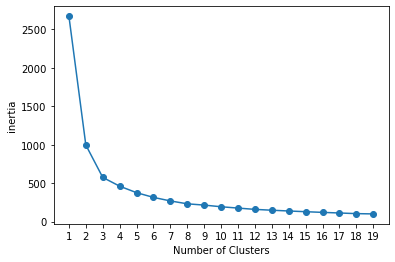

In [32]:
import matplotlib.pyplot as plt

plt.plot(ks, inertias, '-o')
plt.xlabel('Number of Clusters')
plt.ylabel('inertia')

plt.xticks(ks)
plt.show()

**Excellent work!** You can see from the graph the "best" number of clusters. Use this value for the next steps.

**Step 6:** Create a `KMeans` model called `model` with the best value from the above steps.

In [33]:
# Chosen cluster 8 . Create KMeans model with 8 clusters: model
model = KMeans(n_clusters=8)



**Step 7:** Use the .fit_predict() method of model to fit it to samples and derive the cluster labels.

Calling .fit_predict() is the same as calling .fit() and then calling .predict().

In [34]:
# Use the .fit_predict() method of model to fit it to samples and derive the cluster labels.
labels = model.fit_predict(samples)



**Step 8:** Create a DataFrame `df` with two columns named `'labels'` and `'varieties'`, using `labels` and `varieties`, respectively, for the column values.

In [35]:
# # Create a DataFrame with labels and varieties as columns: df

df = pd.DataFrame({'labels': labels, 'varieties': varieties})



**Step 9:** Use the `pd.crosstab()` function on `df['labels']` and `df['varieties']` to count the number of times each grain variety coincides with each cluster label. Assign the result to `ct`.

In [36]:
# Use the pd.crosstab() function on df['labels'] and df['varieties']
ct = pd.crosstab(df['labels'],df['varieties'])



**Step 10:** Display `ct` by evaluating it - and inspect your cross-tabulation!  You'll see that your clustering is pretty good.

In [37]:
# Display ct by evaluating it
print(ct)



varieties  4.519  4.605  4.607  4.649  4.703  4.738  4.745  4.781  4.782  \
labels                                                                     
0              0      0      0      0      0      0      0      1      0   
1              0      0      0      0      0      0      0      0      0   
2              0      0      0      0      0      0      0      0      0   
3              0      0      0      0      0      1      0      1      0   
4              0      0      0      0      0      0      0      0      0   
5              0      0      0      0      0      0      0      0      0   
6              0      0      0      1      0      0      0      0      0   
7              1      1      2      0      1      0      1      0      1   

varieties  4.783  ...  6.316  6.320  6.321  6.362  6.448  6.449  6.451  6.453  \
labels            ...                                                           
0              0  ...      0      0      0      0      0      0      0      0

Now you are done. If you wish, you can also try to plot the clusters to visualize it.


In [38]:
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

# Create crosstab: ct
ct = pd.crosstab(df['labels'],df['varieties'])

# Display ct
print(ct)

varieties  4.519  4.605  4.607  4.649  4.703  4.738  4.745  4.781  4.782  \
labels                                                                     
0              0      0      0      0      0      0      0      1      0   
1              0      0      0      0      0      0      0      0      0   
2              0      0      0      0      0      0      0      0      0   
3              0      0      0      0      0      1      0      1      0   
4              0      0      0      0      0      0      0      0      0   
5              0      0      0      0      0      0      0      0      0   
6              0      0      0      1      0      0      0      0      0   
7              1      1      2      0      1      0      1      0      1   

varieties  4.783  ...  6.316  6.320  6.321  6.362  6.448  6.449  6.451  6.453  \
labels            ...                                                           
0              0  ...      0      0      0      0      0      0      0      0